# Fashion Analysis 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
fashion_df = pd.read_csv("fashiondataset.csv")
fashion_df.head()

,p_id,name,price,colour,brand,ratingCount,avg_rating,description,p_attributes
0,1518329.0,Dupatta Bazaar White Embroidered Chiffon Dupatta,899.0,White,Dupatta Bazaar,1321.0,4.548827,White embroidered&nbsp;dupattaChiffon<br>Hand-...,"{'Occasion': 'Daily', 'Pattern': 'Embroidered'..."
1,5829334.0,Roadster Women Mustard Yellow Solid Hooded Swe...,1199.0,Mustard,Roadster,5462.0,4.313255,"Mustard yellow solid sweatshirt, has a hood, t...","{'Body Shape ID': '443,424,324', 'Body or Garm..."
2,10340119.0,Inddus Peach-Coloured & Beige Unstitched Dress...,5799.0,Peach,Inddus,145.0,4.068966,Peach-Coloured and beige woven design unstitch...,"{'Bottom Fabric': 'Cotton Blend', 'Bottom Patt..."
3,10856380.0,SASSAFRAS Women Black Parallel Trousers,1499.0,Black,SASSAFRAS,9124.0,4.147523,"Black solid woven high-rise parallel trousers,...","{'Add-Ons': 'NA', 'Body Shape ID': '424', 'Bod..."
4,12384822.0,Kotty Women Black Wide Leg High-Rise Clean Loo...,1999.0,Black,Kotty,12260.0,4.078467,"Black dark wash 4-pocket high-rise jeans, clea...","{'Add-Ons': 'NA', 'Brand Fit Name': 'NA', 'Clo..."


In [3]:
brand_df = pd.read_excel('fashion_brand_details.xlsx')
brand_df.head()

,brand_id,brand_name
0,1,513
1,2,109F
2,3,20Dresses
3,4,250 Designs
4,5,3Pin


### 1. SQL implementation to create a main dataframe from the two csv files

In [4]:
# convert pandas dataframe to sqlite table
import sqlite3

conn = sqlite3.connect('fashion.db')
c = conn.cursor()

# creating the fashion table in the database
fashion_df.to_sql('fashion', conn, if_exists='replace', index = False)

# creating the brand table in the database
brand_df.to_sql('brand', conn, if_exists='replace', index = False)



In [5]:
# check if the tables are created in the database
p = """
SELECT name FROM sqlite_master WHERE type='table';
"""
#conn = sqlite3.connect('fashion.db')
#c = conn.cursor()
c.execute(p)
print(c.fetchall())

[('fashion',), ('brand',)]


In [6]:
# select from the fashion table

q = """
SELECT * FROM fashion LIMIT 5;
"""
pd.read_sql(q, conn)

,p_id,name,price,colour,brand,ratingCount,avg_rating,description,p_attributes
0,1518329.0,Dupatta Bazaar White Embroidered Chiffon Dupatta,899.0,White,Dupatta Bazaar,1321.0,4.548827,White embroidered&nbsp;dupattaChiffon<br>Hand-...,"{'Occasion': 'Daily', 'Pattern': 'Embroidered'..."
1,5829334.0,Roadster Women Mustard Yellow Solid Hooded Swe...,1199.0,Mustard,Roadster,5462.0,4.313255,"Mustard yellow solid sweatshirt, has a hood, t...","{'Body Shape ID': '443,424,324', 'Body or Garm..."
2,10340119.0,Inddus Peach-Coloured & Beige Unstitched Dress...,5799.0,Peach,Inddus,145.0,4.068966,Peach-Coloured and beige woven design unstitch...,"{'Bottom Fabric': 'Cotton Blend', 'Bottom Patt..."
3,10856380.0,SASSAFRAS Women Black Parallel Trousers,1499.0,Black,SASSAFRAS,9124.0,4.147523,"Black solid woven high-rise parallel trousers,...","{'Add-Ons': 'NA', 'Body Shape ID': '424', 'Bod..."
4,12384822.0,Kotty Women Black Wide Leg High-Rise Clean Loo...,1999.0,Black,Kotty,12260.0,4.078467,"Black dark wash 4-pocket high-rise jeans, clea...","{'Add-Ons': 'NA', 'Brand Fit Name': 'NA', 'Clo..."


In [7]:
# select the  brand table  

b = """
SELECT * FROM brand LIMIT 5;
"""
pd.read_sql(b, conn)

,brand_id,brand_name
0,1,513
1,2,109F
2,3,20Dresses
3,4,250 Designs
4,5,3Pin


In [8]:
# select data from both tables and create a main dataframe to be used for analysis

r = """
SELECT * FROM fashion
INNER JOIN brand
ON fashion.brand = brand.brand_name
LIMIT 10;
"""
main_df = pd.read_sql(r, conn)
main_df.head()

,p_id,name,price,colour,brand,ratingCount,avg_rating,description,p_attributes,brand_id,brand_name
0,1518329.0,Dupatta Bazaar White Embroidered Chiffon Dupatta,899.0,White,Dupatta Bazaar,1321.0,4.548827,White embroidered&nbsp;dupattaChiffon<br>Hand-...,"{'Occasion': 'Daily', 'Pattern': 'Embroidered'...",242,Dupatta Bazaar
1,5829334.0,Roadster Women Mustard Yellow Solid Hooded Swe...,1199.0,Mustard,Roadster,5462.0,4.313255,"Mustard yellow solid sweatshirt, has a hood, t...","{'Body Shape ID': '443,424,324', 'Body or Garm...",750,Roadster
2,10340119.0,Inddus Peach-Coloured & Beige Unstitched Dress...,5799.0,Peach,Inddus,145.0,4.068966,Peach-Coloured and beige woven design unstitch...,"{'Bottom Fabric': 'Cotton Blend', 'Bottom Patt...",389,Inddus
3,12384822.0,Kotty Women Black Wide Leg High-Rise Clean Loo...,1999.0,Black,Kotty,12260.0,4.078467,"Black dark wash 4-pocket high-rise jeans, clea...","{'Add-Ons': 'NA', 'Brand Fit Name': 'NA', 'Clo...",482,Kotty
4,14021452.0,Sera Women Multicoloured Printed Tie-Up Shrug,1494.0,Multi,Sera,750.0,4.288000,"Brown and blue printed tie-up longline shrug, ...",{'Body or Garment Size': 'To-Fit Denotes Body ...,793,Sera


In [9]:
# close the connection
conn.close()

### 2. Data Analysis of the new dataframe

In [10]:
main_df.head()

,p_id,name,price,colour,brand,ratingCount,avg_rating,description,p_attributes,brand_id,brand_name
0,1518329.0,Dupatta Bazaar White Embroidered Chiffon Dupatta,899.0,White,Dupatta Bazaar,1321.0,4.548827,White embroidered&nbsp;dupattaChiffon<br>Hand-...,"{'Occasion': 'Daily', 'Pattern': 'Embroidered'...",242,Dupatta Bazaar
1,5829334.0,Roadster Women Mustard Yellow Solid Hooded Swe...,1199.0,Mustard,Roadster,5462.0,4.313255,"Mustard yellow solid sweatshirt, has a hood, t...","{'Body Shape ID': '443,424,324', 'Body or Garm...",750,Roadster
2,10340119.0,Inddus Peach-Coloured & Beige Unstitched Dress...,5799.0,Peach,Inddus,145.0,4.068966,Peach-Coloured and beige woven design unstitch...,"{'Bottom Fabric': 'Cotton Blend', 'Bottom Patt...",389,Inddus
3,12384822.0,Kotty Women Black Wide Leg High-Rise Clean Loo...,1999.0,Black,Kotty,12260.0,4.078467,"Black dark wash 4-pocket high-rise jeans, clea...","{'Add-Ons': 'NA', 'Brand Fit Name': 'NA', 'Clo...",482,Kotty
4,14021452.0,Sera Women Multicoloured Printed Tie-Up Shrug,1494.0,Multi,Sera,750.0,4.288000,"Brown and blue printed tie-up longline shrug, ...",{'Body or Garment Size': 'To-Fit Denotes Body ...,793,Sera


In [11]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   p_id          10 non-null     float64
 1   name          10 non-null     object 
 2   price         10 non-null     float64
 3   colour        10 non-null     object 
 4   brand         10 non-null     object 
 5   ratingCount   10 non-null     float64
 6   avg_rating    10 non-null     float64
 7   description   10 non-null     object 
 8   p_attributes  10 non-null     object 
 9   brand_id      10 non-null     int64  
 10  brand_name    10 non-null     object 
dtypes: float64(4), int64(1), object(6)
memory usage: 1008.0+ bytes


#### 2.1. Data Cleaning

In [12]:
# 1.check for missing data
missing_values=main_df.isnull().sum()
percent_missing = main_df.isnull().sum()/main_df.shape[0]*100

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %
p_id,0,0.0
name,0,0.0
price,0,0.0
colour,0,0.0
brand,0,0.0
ratingCount,0,0.0
avg_rating,0,0.0
description,0,0.0
p_attributes,0,0.0
brand_id,0,0.0


The dataframe does not contain any missing values

In [13]:
# 2.check if there any duplicated data in the dataframe
duplicate_1 = main_df[main_df.duplicated()]
if duplicate_1.empty== True:
    print("no duplicated data")
else:
    print("Duplicate Rows except first occurrence based on all columns are :")
    print(duplicate_1)

no duplicated data


<AxesSubplot:>

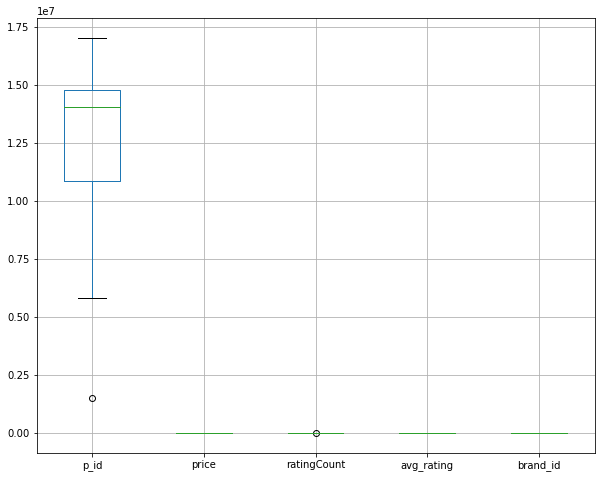

In [14]:
# 3. Checking for outliers 
main_df.boxplot(figsize=(10,8))

In [15]:
main_df.describe()

,p_id,price,ratingCount,avg_rating,brand_id
count,1.000000e+01,10.000000,10.000000,10.000000,10.000000
mean,1.213127e+07,2588.500000,2727.700000,4.217958,575.400000
std,4.965914e+06,1896.778629,3837.643115,0.250240,286.693487
min,1.518329e+06,699.000000,84.000000,3.809524,75.000000
25%,1.085129e+07,1249.000000,296.250000,4.071341,408.500000
50%,1.404224e+07,1746.500000,1036.500000,4.249718,616.000000
75%,1.479750e+07,4174.000000,3855.500000,4.392113,782.250000
max,1.704861e+07,5799.000000,12260.000000,4.548827,903.000000


In [16]:
main_df.columns

Index(['p_id', 'name', 'price', 'colour', 'brand', 'ratingCount', 'avg_rating',
       'description', 'p_attributes', 'brand_id', 'brand_name'],
      dtype='object')

### 3. Analysis of the data and visualization

Questions to answer:
<ol start=1>
<li> What is the most popular brand?</li>
<li> what are the most expensive brands?</li>
<li> what is the relationship between price and avg_rating?</li>
<li> what is the relationship of the features to each other?</li>
</ol>

In [17]:
sns.set_style('darkgrid')

In [18]:
main_df['brand'].value_counts()

Roadster          2
Tokyo Talkies     2
Dupatta Bazaar    1
Inddus            1
Kotty             1
Sera              1
Anouk             1
Khushal K         1
Name: brand, dtype: int64

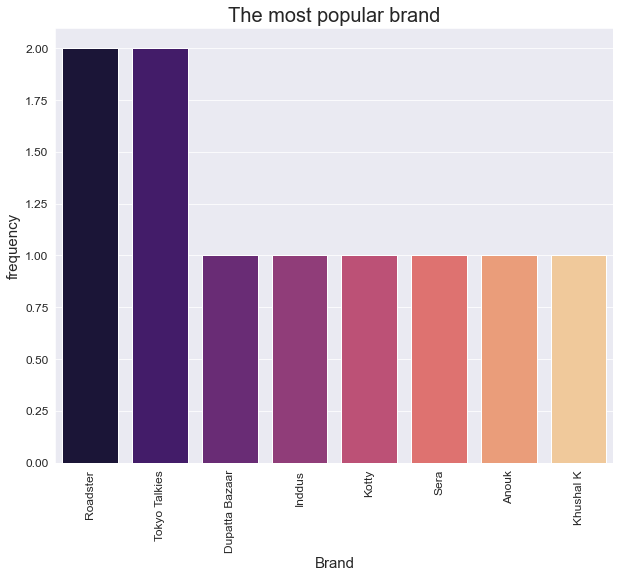

In [19]:
# What is the most popular brand?
plt.figure(figsize=(10,8))
sns.countplot(x='brand', data=main_df, order=main_df['brand'].value_counts().index[:12],palette='magma',orient='h')

plt.title('The most popular brand',fontsize=20)
plt.xlabel('Brand',fontsize=15)
plt.ylabel('frequency',fontsize=15)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.show()


The most popular brands are Roadster and Tokyo Talkies

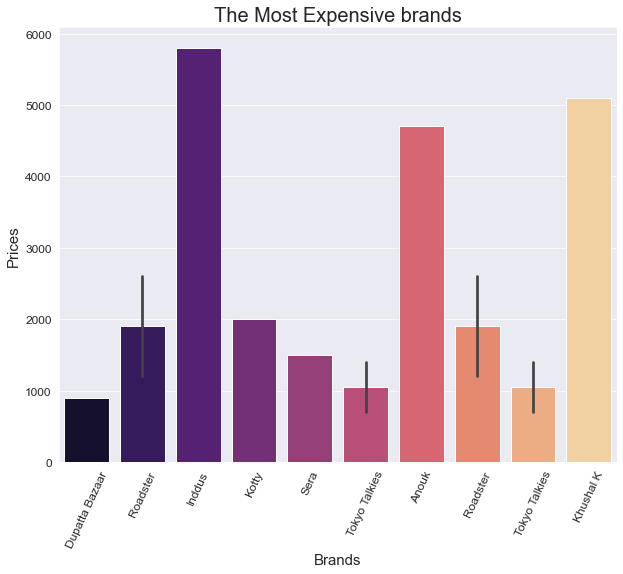

In [20]:
# what are the most expensive brands?
plt.figure(figsize=(10,8))
sns.barplot(x=main_df['brand'], y=main_df['price'] , data=main_df ,order=main_df['brand'],palette='magma')
plt.title("The Most Expensive brands",fontsize=20)
plt.xlabel("Brands",fontsize=15)
plt.ylabel("Prices",fontsize=15)
plt.xticks(rotation=65,fontsize=12)
plt.yticks(fontsize=12)
plt.show()

The most expensive brand is Inddus  

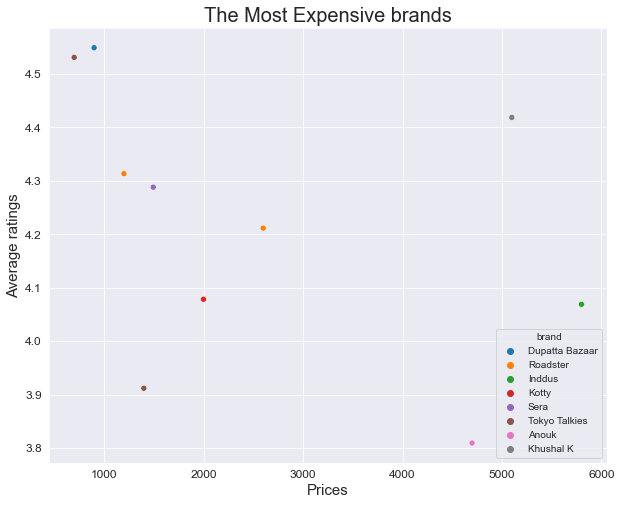

In [21]:
# what is the relationship between price and avg_rating
plt.figure(figsize=(10,8))
sns.scatterplot(data=main_df, x='price', y='avg_rating', hue='brand')
plt.title("The Most Expensive brands",fontsize=20)
plt.xlabel("Prices",fontsize=15)
plt.ylabel("Average ratings",fontsize=15)
plt.xticks(rotation=0,fontsize=12)
plt.yticks(fontsize=12)
plt.show()

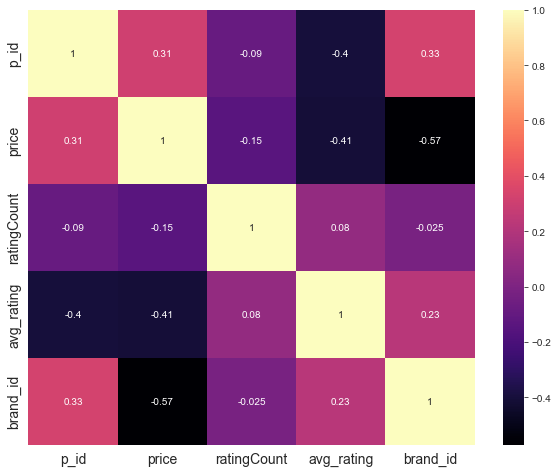

In [22]:
# what is the relationship of the features to each other?
# plotting a heatmap 
fig , ax = plt.subplots(figsize=(10,8))
sns.heatmap(main_df.corr(),annot=True,ax=ax, cmap='magma')

plt.title("")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### 4. Preprocessing of the data

In [23]:
main_df['p_attributes'].value_counts()

{'Occasion': 'Daily', 'Pattern': 'Embroidered', 'Print or Pattern Type': 'Floral'}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [24]:
main_df['description'].value_counts()

White embroidered&nbsp;dupattaChiffon<br>Hand-wash coldLength: 2.5 metres Width: 1 metre                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         1
Mustard yellow solid sweatshirt, has a hood, two pockets, long sleeves, zip closure, straight hemThe model (height 5'8") is wearing a size S100% cotton<br>Machine-wash                              

In [25]:
# dropping both the column p_attributes and description as they are text data 
main_df.drop(['p_attributes','description'],axis=1,inplace=True)

In [26]:
# dropping the brand_name column as it is a duplicate of the brand column
main_df.drop(['brand_name'],axis=1,inplace=True)

In [27]:
main_df.dtypes

p_id           float64
name            object
price          float64
colour          object
brand           object
ratingCount    float64
avg_rating     float64
brand_id         int64
dtype: object

In [28]:
# label encoding the categorical data

from sklearn.preprocessing import LabelEncoder

def label_encoder(df, column):
    le = LabelEncoder()
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])
    return df

main_df = label_encoder(main_df, 'brand')
main_df = label_encoder(main_df, 'colour')
main_df = label_encoder(main_df, 'name')

In [29]:
main_df.dtypes

p_id           float64
name             int64
price          float64
colour           int64
brand            int64
ratingCount    float64
avg_rating     float64
brand_id         int64
dtype: object

In [30]:
# feature scaling 
from sklearn.preprocessing import StandardScaler

def scale_features(df, columns):
    sc = StandardScaler()
    for col in columns:
        if col in df.columns and df[col].dtype != 'object':
            df[col] = sc.fit_transform(df[col].values.reshape(-1,1))
    return df

main_df = scale_features(main_df, main_df.columns)

In [31]:
# feature selection
from sklearn.feature_selection import SelectKBest

def feature_selection(df, target, k):
    X = df.drop(target, axis=1)
    y = df[target]
    selector = SelectKBest(k=k)
    selector.fit(X, y)
    return X.columns[selector.get_support()]

features = feature_selection(main_df, 'price', 5)
features

Index(['colour', 'brand', 'ratingCount', 'avg_rating', 'brand_id'], dtype='object')

In [32]:
# log transformation 

# def log_transformer(main_df, col):
    #for column in col:
        #main_df[column] = np.log(main_df[column])
    #return main_df

# main_df = log_transformer(main_df, main_df.columns)

In [33]:
# dropping unnecessary features
main_df.drop(['p_id'],axis=1,inplace=True)

In [34]:
# splitting the data into train and test set
from sklearn.model_selection import train_test_split

X = main_df.drop('price', axis=1)
y = main_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Machine Learning Models

In [35]:
# Linear Regression
from sklearn.linear_model import LinearRegression

def Modelling(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

def Evaluation(y_test, y_pred):
    from sklearn.metrics import mean_squared_error, r2_score
    print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
    print('R2 Score: ', r2_score(y_test, y_pred))

y_pred  = Modelling(LinearRegression(), X_train, y_train, X_test, y_test)

In [36]:
# Evaluation of the base linear regression model
Evaluation(y_test, y_pred)

Mean Squared Error:  76.23715033210219
R2 Score:  -24684.53019374315


In [37]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

y_pred1  = Modelling(DecisionTreeRegressor(), X_train, y_train, X_test, y_test)
y_pred1

array([1.17286345, 1.39515456])

In [38]:
# Evaluation of the decision tree model
Evaluation(y_test, y_pred1)

Mean Squared Error:  4.030275242320299
R2 Score:  -1303.9999999999986


In [39]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

y_pred2  = Modelling(RandomForestRegressor(), X_train, y_train, X_test, y_test)
y_pred2

array([ 0.38714775, -0.13548643])

In [40]:
# Evaluation of the Random forest model
Evaluation(y_test, y_pred2)

Mean Squared Error:  0.7520385993048624
R2 Score:  -242.5095156249997


In [41]:
# tuning Random forest model
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10, 15, 100],
    'min_samples_leaf': [1, 2, 5, 10]   
}

grid = GridSearchCV(RandomForestRegressor(), params, verbose=1, cv=3, n_jobs=-1)
grid.fit(X_train, y_train)

grid.best_params_

Fitting 3 folds for each of 600 candidates, totalling 1800 fits


{'max_depth': 25,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [42]:
# tuned Random forest model
y_pred3  = Modelling(RandomForestRegressor(n_estimators= 100, min_samples_split= 2, min_samples_leaf= 2, max_depth= 10), X_train, y_train, X_test, y_test)
y_pred3

array([ 0.28253223, -0.32256547])

In [43]:
# Evaluation of the tuned Random forest model
Evaluation(y_test, y_pred3)

Mean Squared Error:  0.5462408502683282
R2 Score:  -175.87236398022551


In [44]:
# clustering
from sklearn.cluster import KMeans

def clustering(df, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(df)
    return kmeans

kmeans = clustering(main_df, 5)
kmeans.labels_


array([3, 2, 0, 1, 2, 2, 0, 2, 2, 4], dtype=int32)

In [45]:
kmeans.cluster_centers_

array([[-1.21854359,  1.47851373,  0.18470284, -1.29099445, -0.71777249,
        -1.17403318, -1.2625867 ],
       [-0.17407766, -0.32760152, -0.9696899 ,  0.        ,  2.61825452,
        -0.58758516, -0.34340593],
       [ 0.87038828, -0.61713569, -0.04617571,  0.86066297, -0.25783447,
         0.13952114,  0.89859111],
       [-1.21854359, -0.93890206,  1.80085268, -1.29099445, -0.3863809 ,
         1.39372493, -1.22581947],
       [-0.52223297,  1.39515456, -0.9696899 , -0.43033148,  0.49284371,
         0.84432089, -0.39855678]])

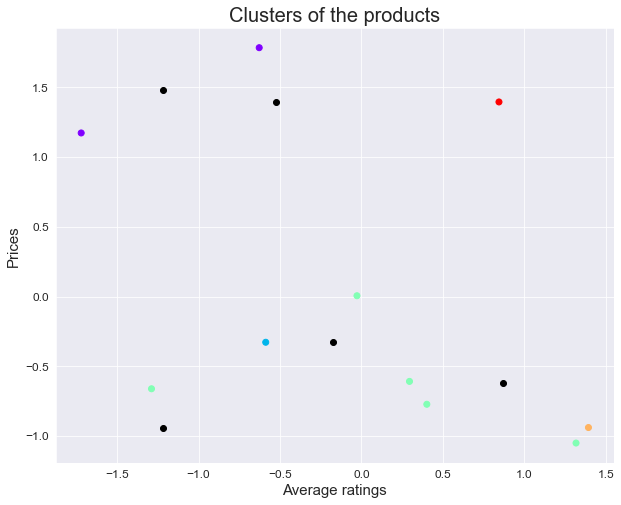

In [46]:
# plotting the clusters
plt.figure(figsize=(10,8))
plt.scatter(main_df['avg_rating'], main_df['price'], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.title("Clusters of the products",fontsize=20)
plt.xlabel("Average ratings",fontsize=15)
plt.ylabel("Prices",fontsize=15)
plt.xticks(rotation=0,fontsize=12)
plt.yticks(fontsize=12)
plt.show()